In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
client_information = pd.read_csv ('../data/client_information.csv')

In [3]:
defaults = pd.read_csv ('../data/loan_default_indicator.csv')

In [4]:
loan_numbers = pd.read_csv ('../data/loans_per_customer.csv')

## Joining data sets

In [5]:
data = (client_information
        .join (defaults.set_index ('uid'), on = 'uid')
        .join (loan_numbers.set_index ('uid'), on = 'uid')
       )

In [6]:
# Good good

data.shape [0] == client_information.shape [0]

True

### Total number of loans
Very surprisingly, there is nothing of interest here

In [7]:
data.groupby ('default').total_loan_number.mean ()

default
0    3.615941
1    3.558528
Name: total_loan_number, dtype: float64

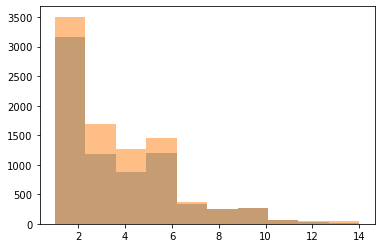

In [8]:
plt.hist (data[data.default == 1].total_loan_number, alpha = 0.5);
plt.hist (data[data.default == 0].total_loan_number, alpha = 0.5);

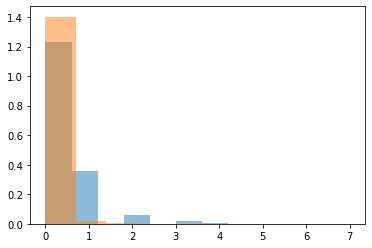

In [9]:
# Maybe there's something here—the number of loans without a repay period . . .

plt.hist (data[data.default == 1].no_repay_loan_number, alpha = 0.5, density=True);
plt.hist (data[data.default == 0].no_repay_loan_number, alpha = 0.5, density=True);

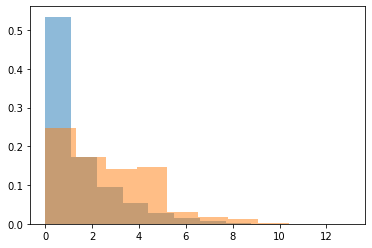

In [10]:
# Maybe there's something here—the number of that are currently under consideration. 

plt.hist (data[data.default == 1].total_valid_loan_number, alpha = 0.5, density=True);
plt.hist (data[data.default == 0].total_valid_loan_number, alpha = 0.5, density=True);

## Exploring the F's

These features are being dropped based on too much similarity to other features. It could be important distinctions exist between these similar features, but that's too bad

### Dropping lots of data from previous exploration

In [11]:
to_drop = [6, 34, 38, 52, 53, 54, 55, 56, 57, 61, 62, 63, 
           66, 86, 88, 90, 91, 93, 94, 96, 97, 98, 105,
           106, 107, 110 , 112, 124, 138, 157, 170, 171, 172, 
           178, 179, 199, 200, 207, 225]

for i in to_drop:
    data.drop ('f_' + str (i), axis = 1, inplace = True)
    
    
# correlation too high
other_to_drop = ['f_123', 'f_58', 'f_20', 'f_32', 'f_33', 'f_36', 'f_37',
                 'f_60', 'f_69', 'f_77', 'f_142', 'f_19', 'f_65',
                 'f_71', 'f_162', 'f_166', 'f_168', 'f_213', 'f_214', 'f_144', 
                 'f_145', 'f_146'
                ]

data.drop (other_to_drop, axis = 1, inplace = True)

In [12]:
# potential_data_leakage

potential_data_leakage = ['f_4', 'f_5', 'f_22']

data.drop (potential_data_leakage, axis = 1, inplace = True)

In [13]:
# Resemble too closely the credit score (perhaps are factors that go into it)

credit_score = ['f_7', 'f_12', 'f_236', 'f_242', 'f_248', 'f_254', 'f_260','f_266', 'f_272']

for i in credit_score:
    data.drop (str (i), axis = 1, inplace = True)

In [14]:
# The same missingness

to_drop = ['f_156', 'f_158', 'f_176', 'f_177', 'f_180', 'f_181', 'f_182', 'f_111', 'f_216']

for i in to_drop:
    data.drop (i, axis = 1, inplace = True)

In [15]:
data.shape

(16347, 148)

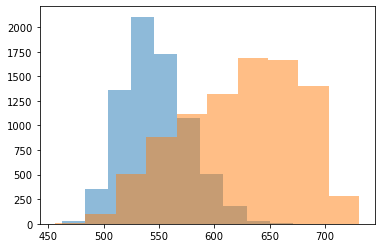

In [16]:
# At least credit score has some correlation with defaulting

plt.hist (data[data.default == 1].f_1, alpha = 0.5);
plt.hist (data[data.default == 0].f_1, alpha = 0.5);

f_1


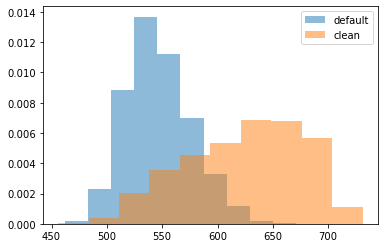

f_3


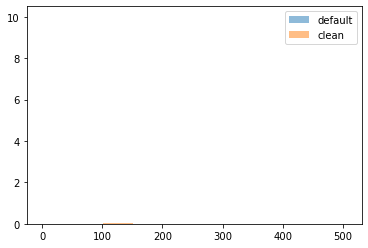

f_17


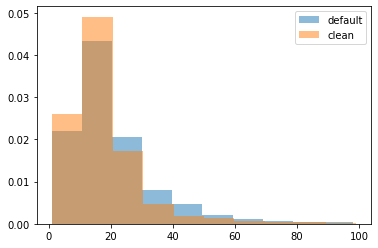

f_18


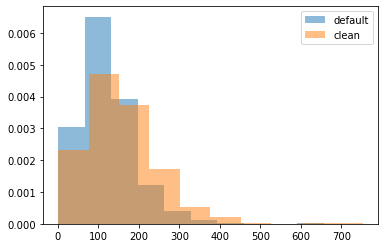

f_21


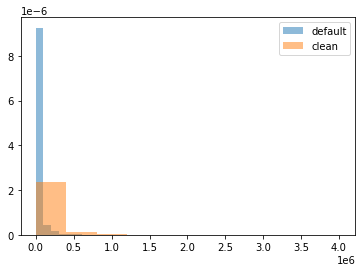

f_29


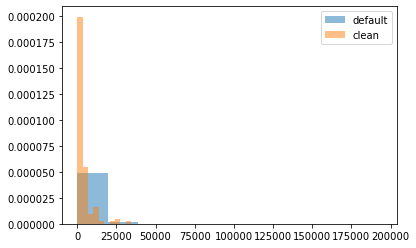

f_31


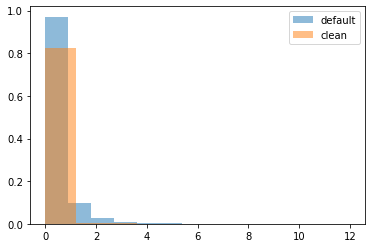

f_35


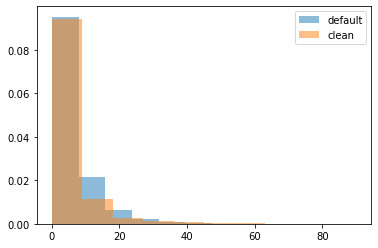

f_39


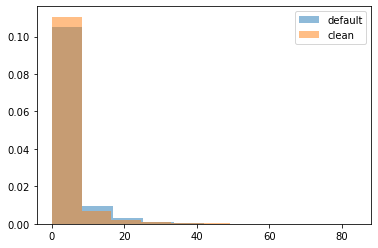

f_40


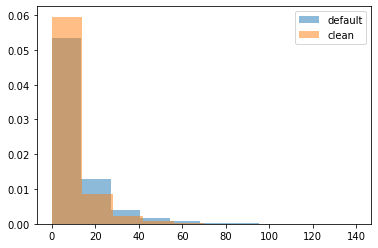

f_41


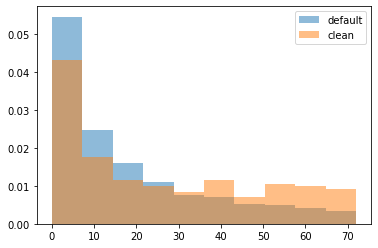

f_45


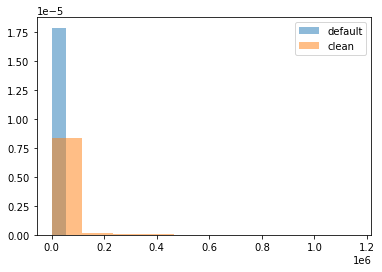

f_46


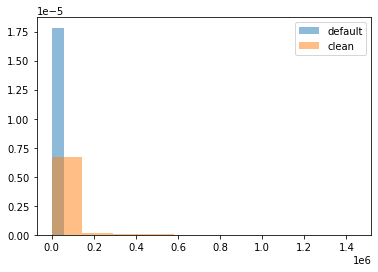

f_47


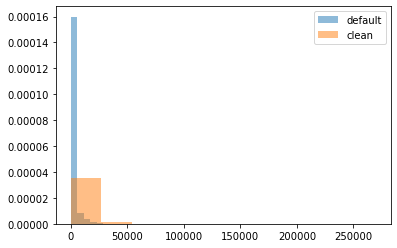

f_48


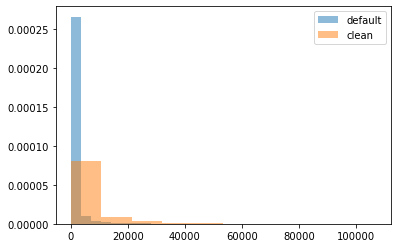

f_49


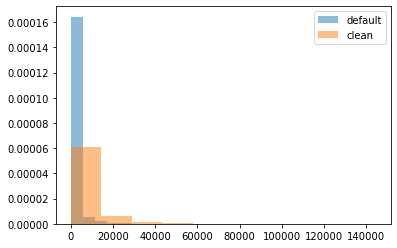

f_50


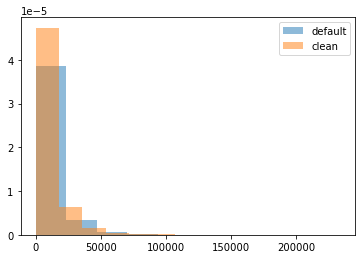

f_51


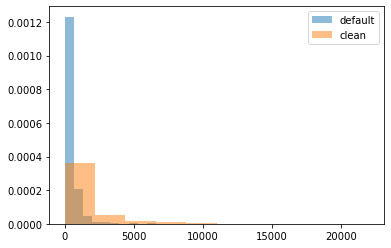

f_59


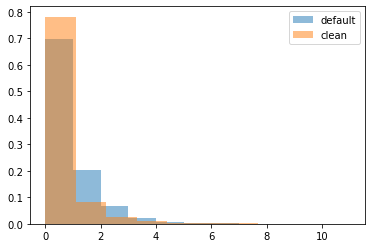

f_64


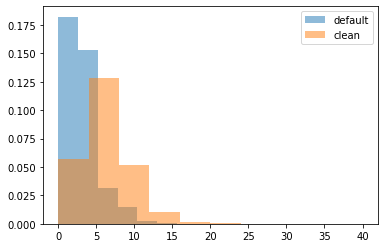

f_67


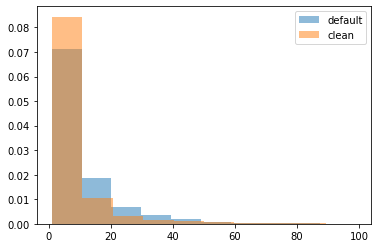

f_68


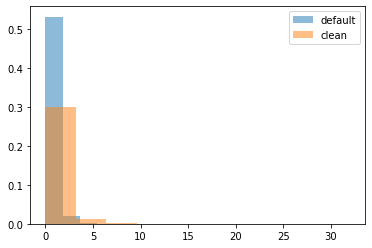

f_70


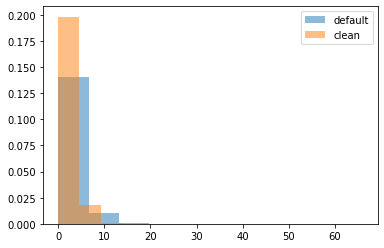

f_72


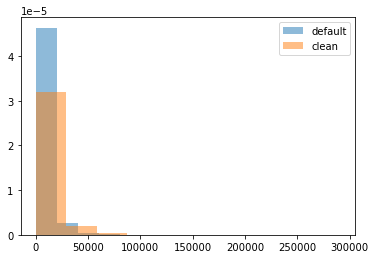

f_73


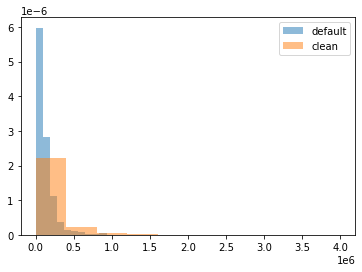

f_74


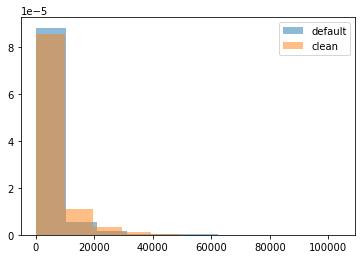

f_76


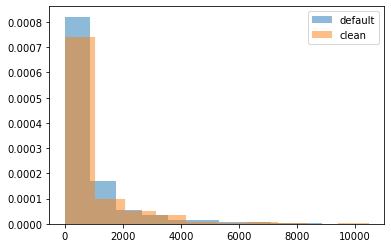

f_79


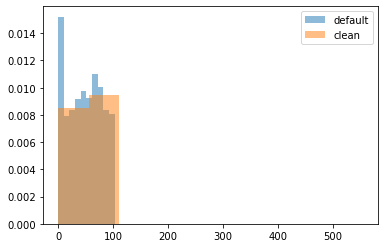

f_80


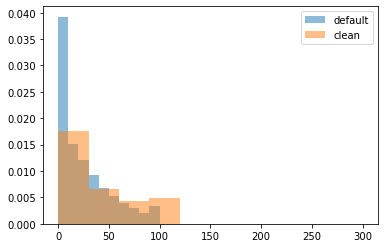

f_81


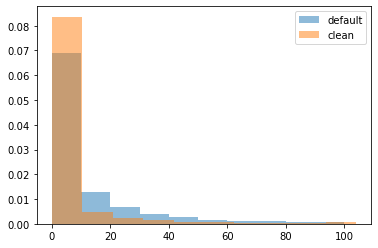

f_82


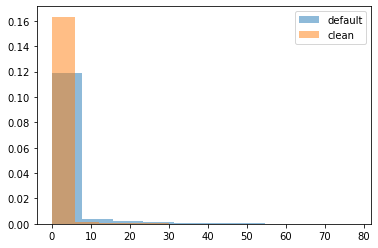

f_83


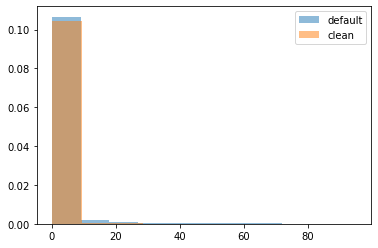

f_85


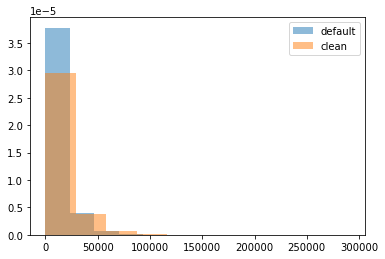

f_87


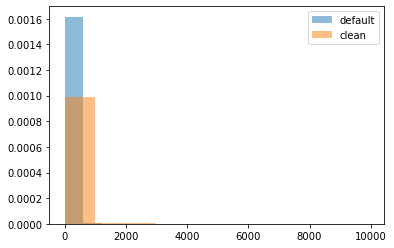

f_89


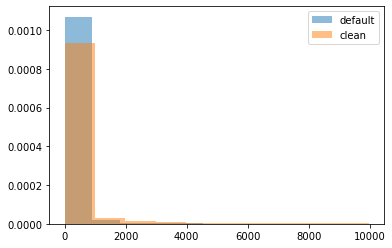

f_92


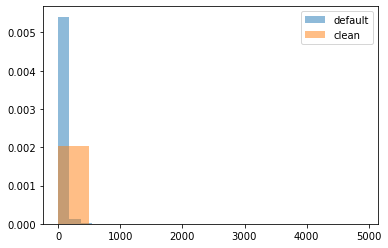

f_95


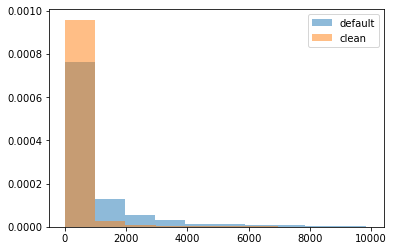

f_99


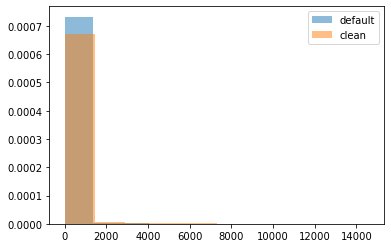

f_100


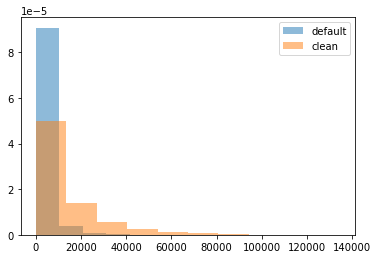

f_101


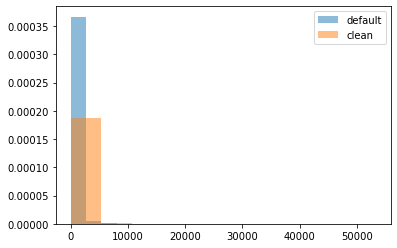

f_102


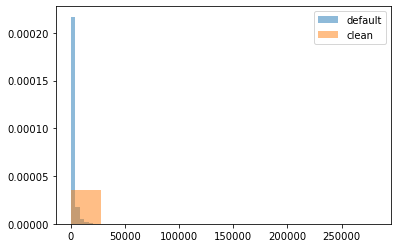

f_103


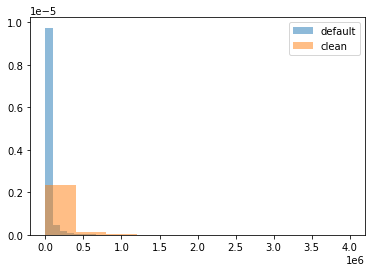

f_104


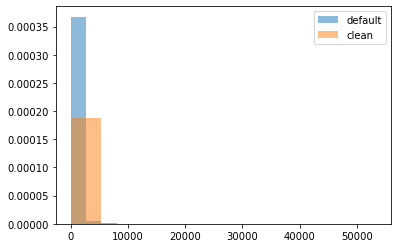

f_108


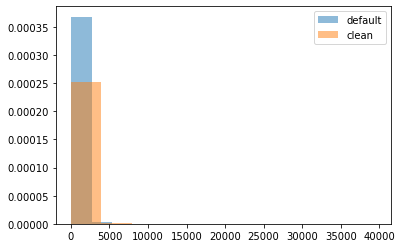

f_109


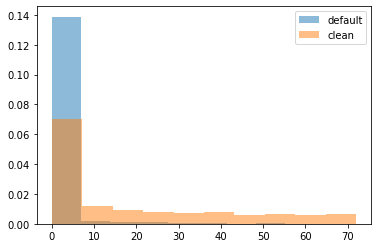

f_113


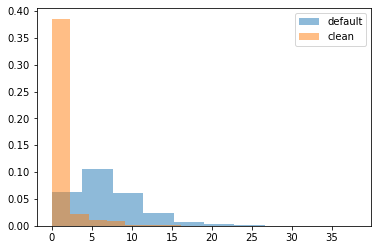

f_135


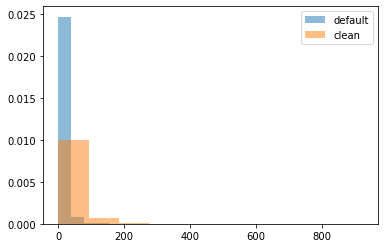

f_136


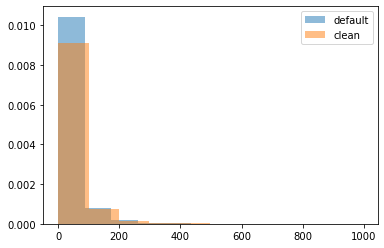

f_137


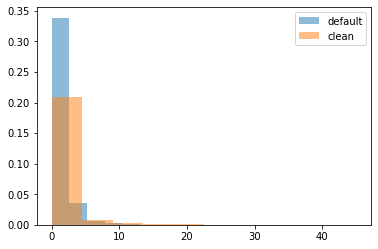

f_155


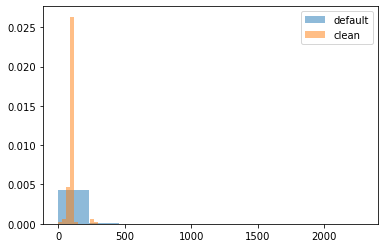

f_167


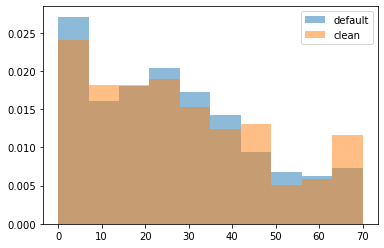

f_169


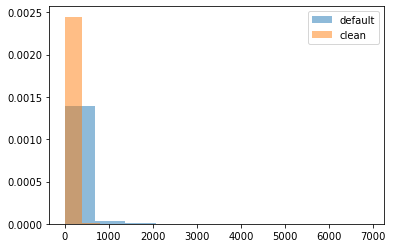

f_201


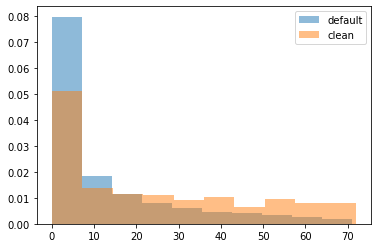

f_208


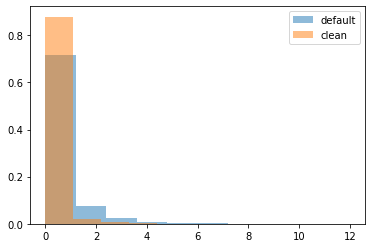

f_209


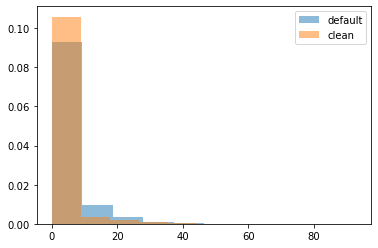

f_211


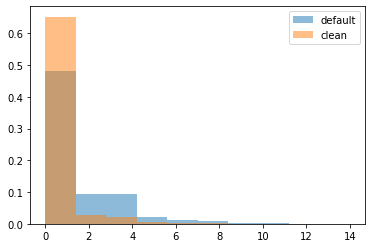

f_215


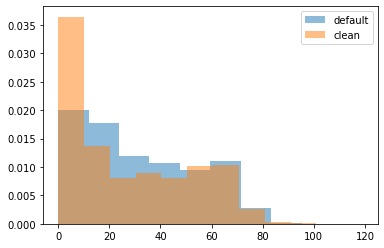

f_220


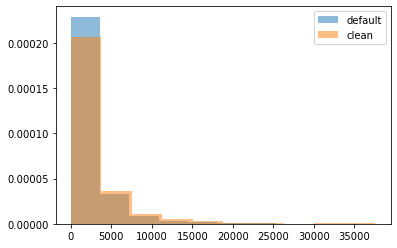

f_221


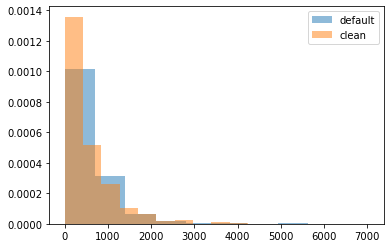

f_222


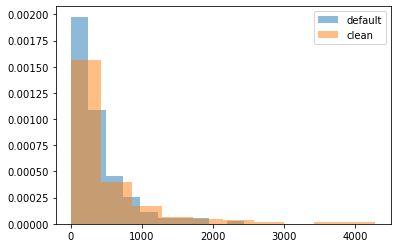

f_223


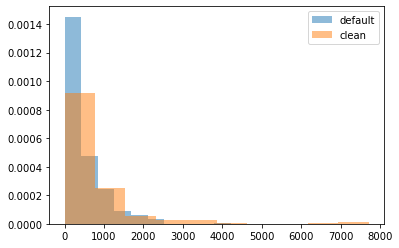

f_224


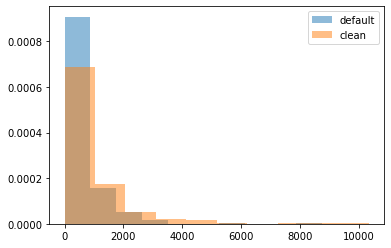

f_226


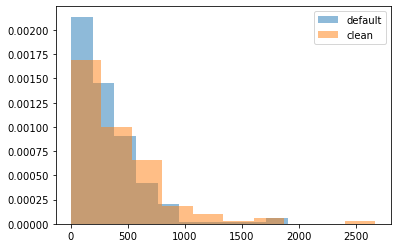

f_227


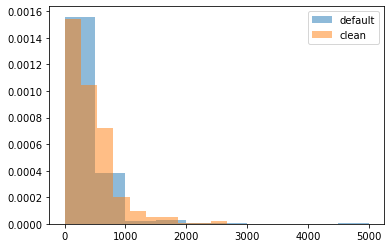

f_228


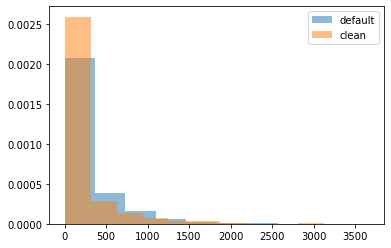

f_229


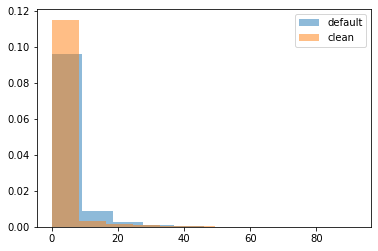

f_231


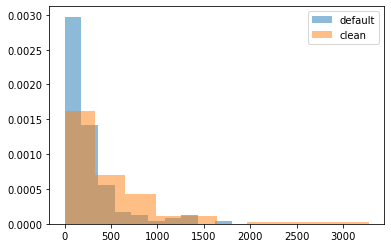

f_232


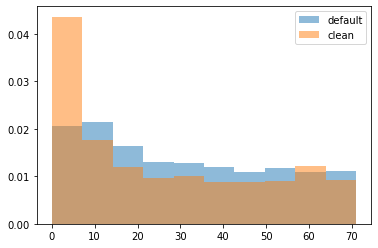

In [17]:
# Plots excluding missing indicator
# Will deal with that later

for c in data.set_index ('uid').columns.values [:-5]:
    if (c [-1] == 'o') | (c [-1] == 'c'):
        continue
    else:
        print (c)
        
        plt.hist (data[(data.default == 1) & (data [c] > -99999.0)] [c], 
                  alpha = 0.5, 
                  label='default', 
                  density=True
                 );
        
        plt.hist (data[(data.default == 0) & (data [c] > -99999.0)] [c], 
                  alpha = 0.5, 
                  label='clean', 
                  density=True
                 );
        
        plt.legend ()
        plt.show ()

## Looking at the role of missing data

f_17


/var/folders/4t/nm_5yvhx1zzgv15xvftc30s40000gn/T/ipykernel_95126/1743678883.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_data [c] = quick_data [c].apply (lambda x : 1 if x < -999990.0 else 0)


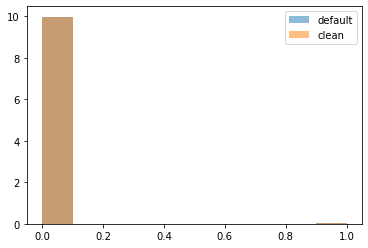

f_18


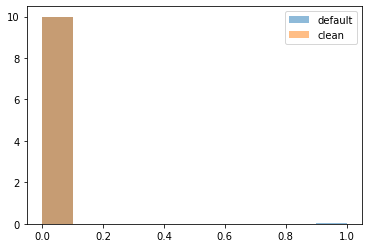

f_21


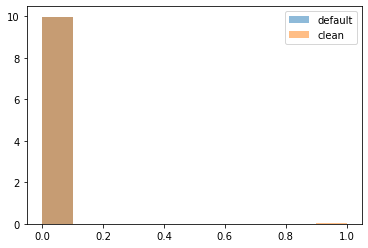

f_29


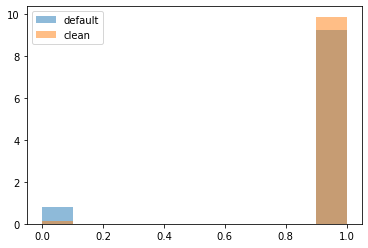

f_31


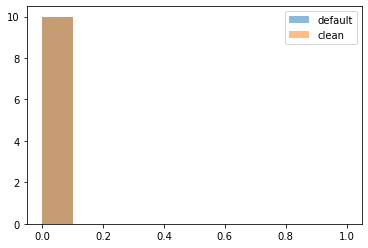

f_35


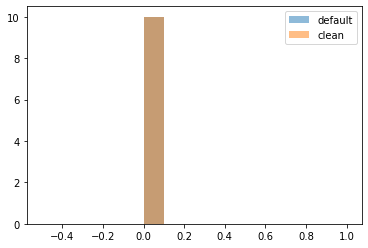

f_39


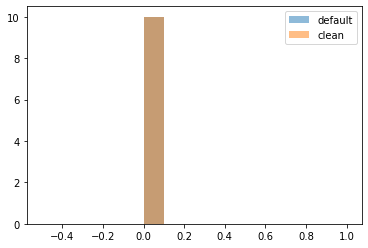

f_41


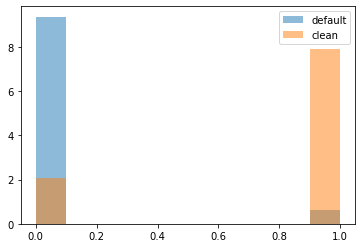

f_45


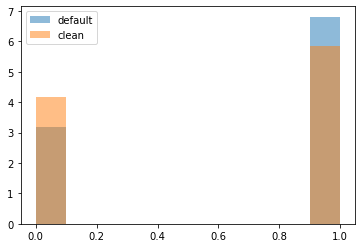

f_46


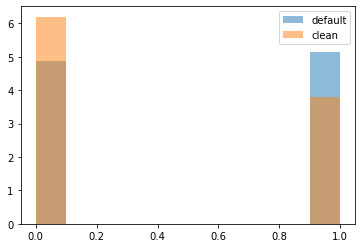

f_47


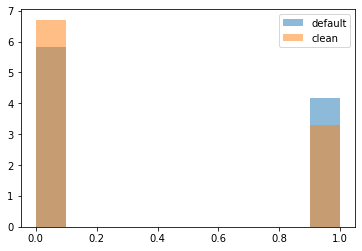

f_48


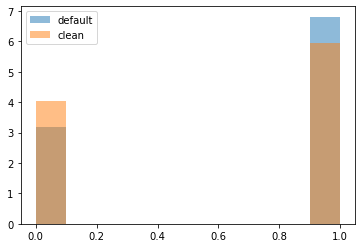

f_49


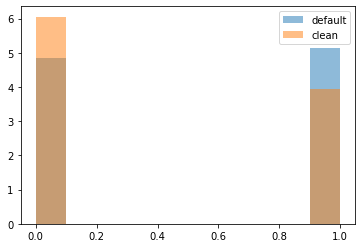

f_50


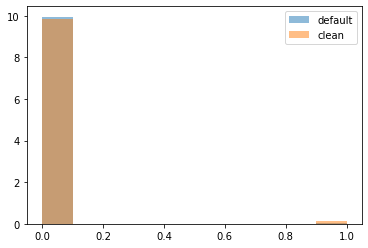

f_51


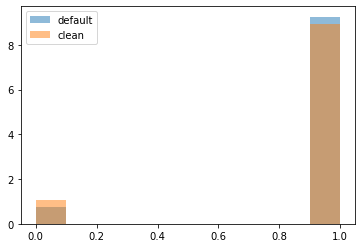

f_67


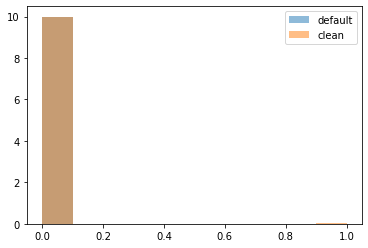

f_72


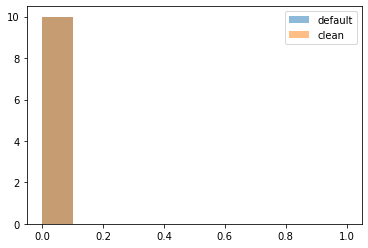

f_73


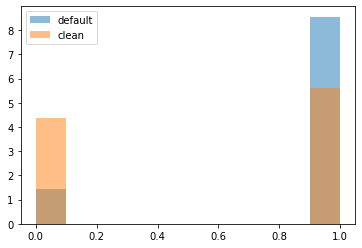

f_74


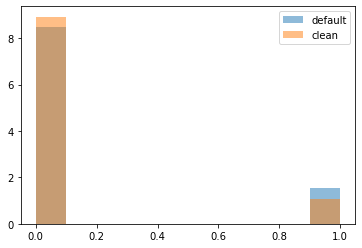

f_76


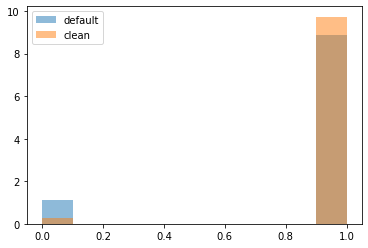

f_79


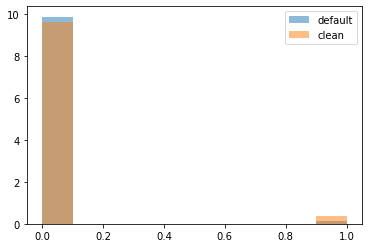

f_80


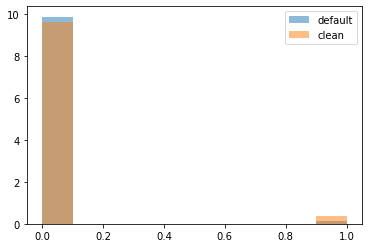

f_81


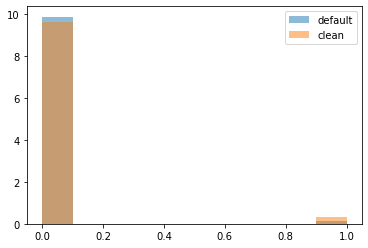

f_83


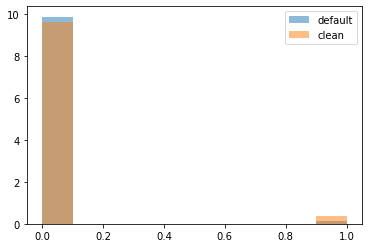

f_85


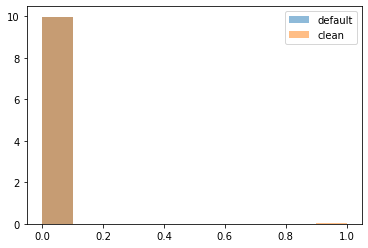

f_87


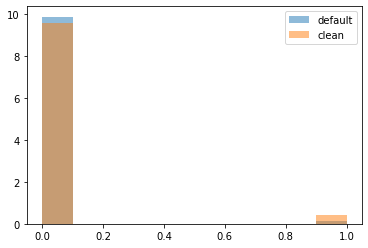

f_89


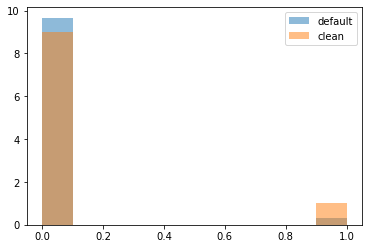

f_92


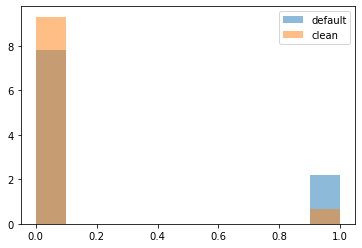

f_95


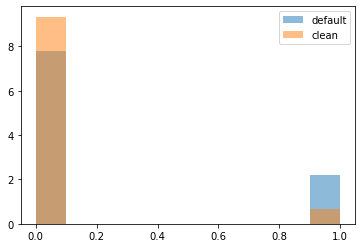

f_99


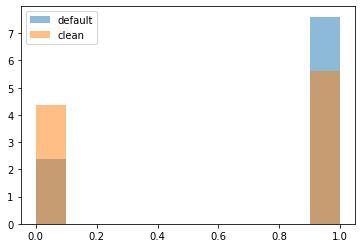

f_100


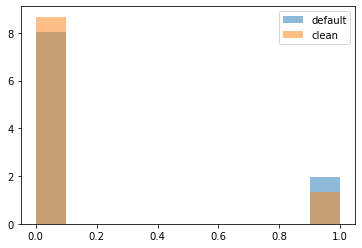

f_101


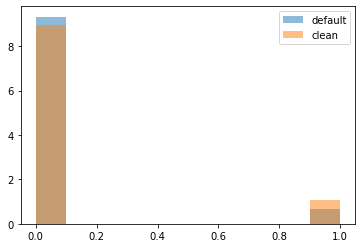

f_102


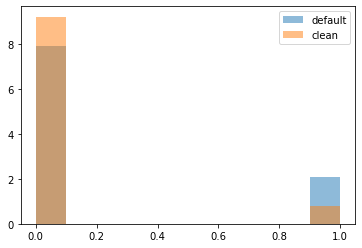

f_103


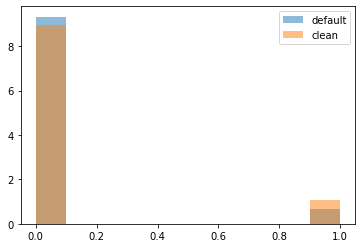

f_104


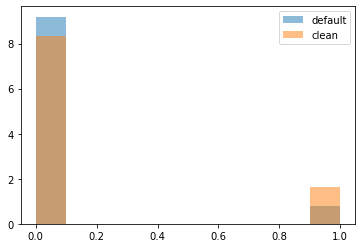

f_108


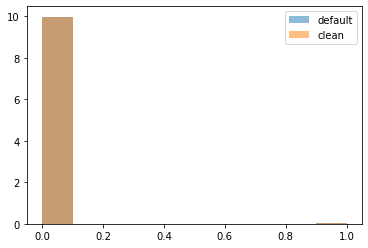

f_109


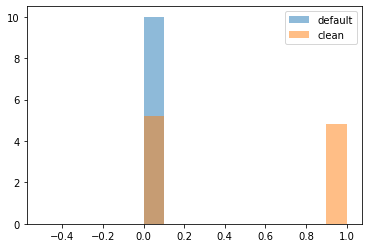

f_135


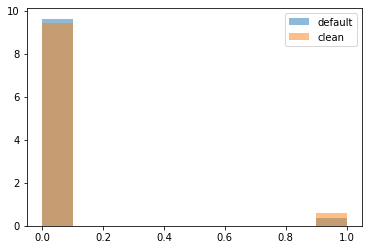

f_136


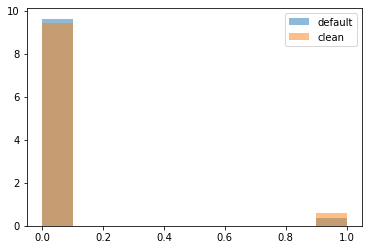

f_155


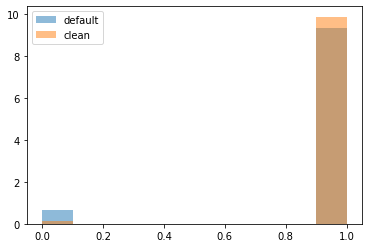

f_167


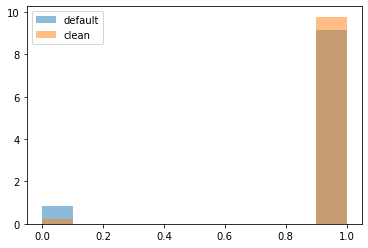

f_169


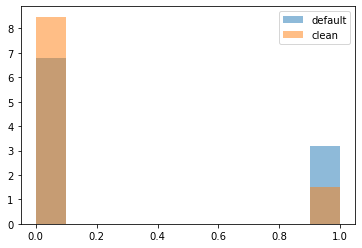

f_201


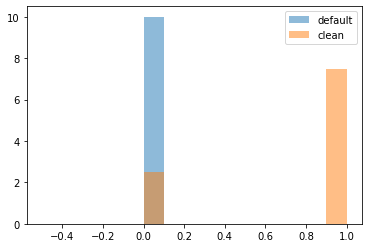

f_208


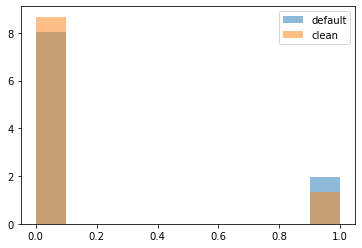

f_209


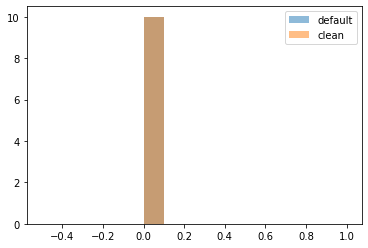

f_215


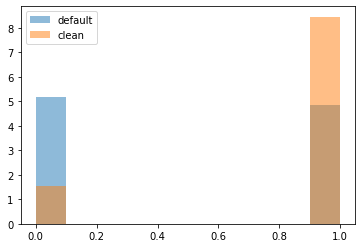

f_220


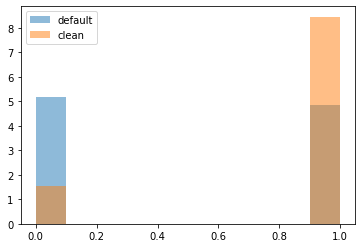

f_221


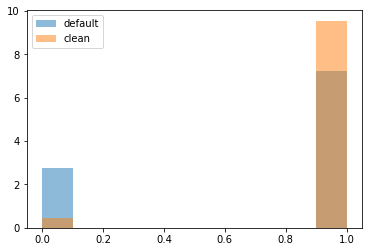

f_222


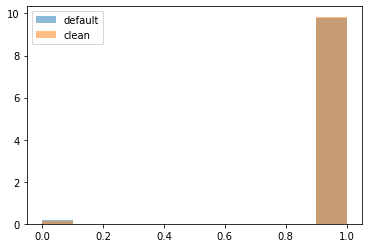

f_223


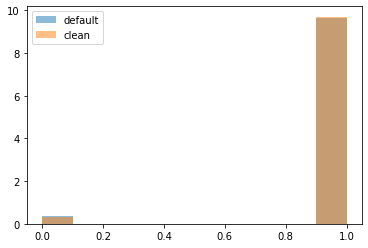

f_224


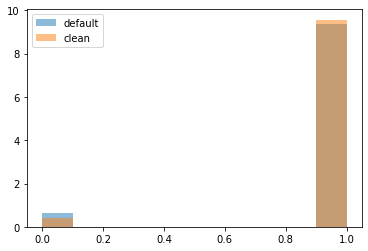

f_226


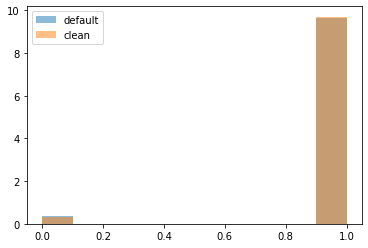

f_227


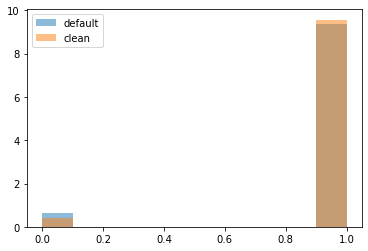

f_228


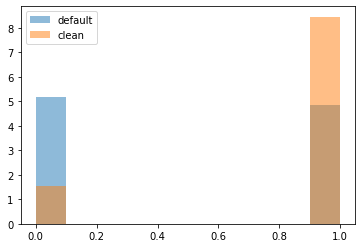

f_229


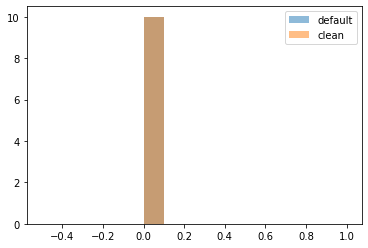

f_231


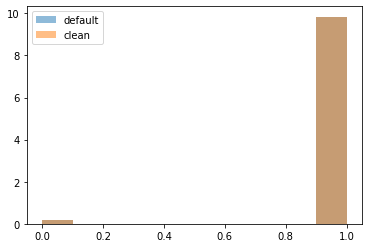

f_232


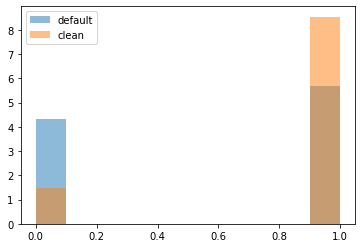

In [18]:
# Plots only for missing indicator
# Of interest: 
# f_29, f_41, f_45, f_73, f_76, f_92, f_99, f_102, 
# f_109, f_111, f_155, f_169, f_201, f_215, f_221, f_228, f_232

not_missing = []

for c in data.set_index ('uid').columns.values [:-5]:
    if (c [-1] == 'o') | (c [-1] == 'c'):
        continue
    else:
        
        quick_data = data [[c, 'default']]
        quick_data [c] = quick_data [c].apply (lambda x : 1 if x < -999990.0 else 0)
        
        if quick_data [c].std () == 0:
            not_missing.append (c)
            continue
            
        print (c)
        
        plt.hist (quick_data[(quick_data.default == 1)] [c], 
                  alpha = 0.5, 
                  label='default', 
                  density=True
                 );
        
        plt.hist (quick_data[(quick_data.default == 0)] [c], 
                  alpha = 0.5, 
                  label='clean', 
                  density=True
                 );
        
        plt.legend ()
        plt.show ()

In [19]:
# These 'features when missing are interesting

interesting_missing = ['f_29', 'f_41', 'f_45', 'f_73', 'f_76', 'f_99', 'f_102', 
                       'f_109', 'f_155', 'f_169', 'f_228', 'f_231', 'f_232']

f_29


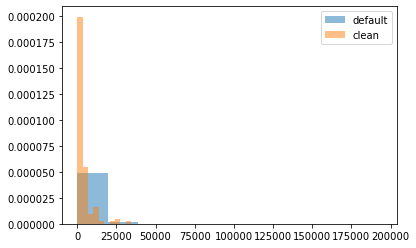

f_41


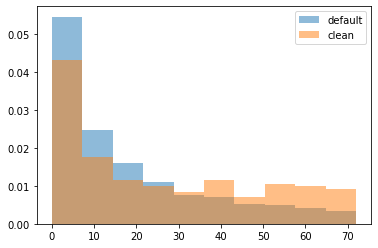

f_45


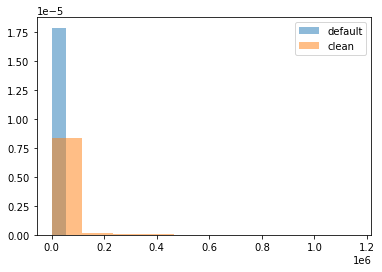

f_73


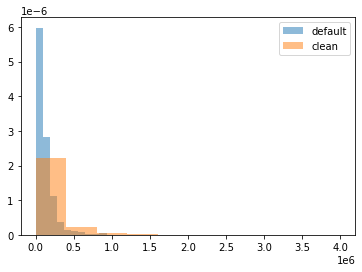

f_76


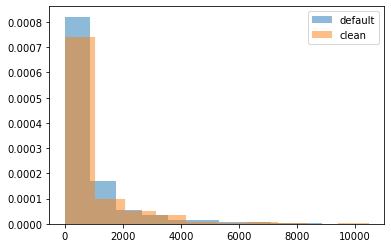

f_99


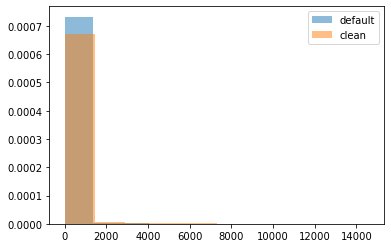

f_102


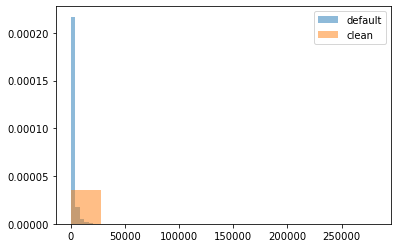

f_109


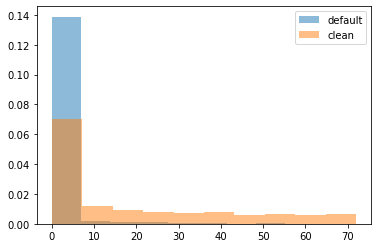

f_155


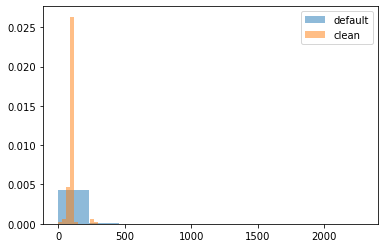

f_169


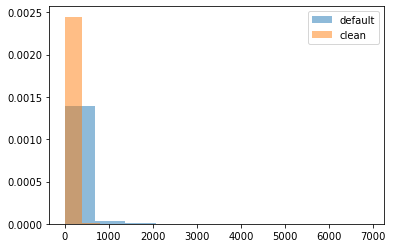

f_228


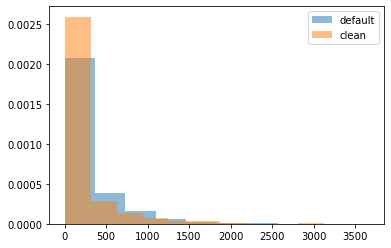

f_231


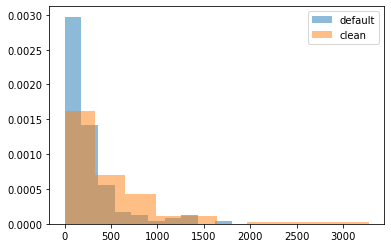

f_232


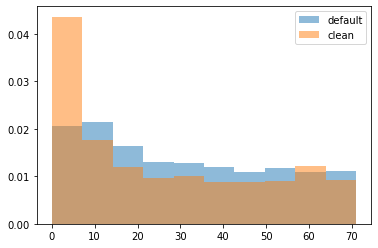

In [20]:
for c in interesting_missing:
        print (c)
        
        plt.hist (data[(data.default == 1) & (data [c] > -99999.0)] [c], 
                  alpha = 0.5, 
                  label='default', 
                  density=True
                 );
        
        plt.hist (data[(data.default == 0) & (data [c] > -99999.0)] [c], 
                  alpha = 0.5, 
                  label='clean', 
                  density=True
                 );
        
        plt.legend ()
        plt.show ()

In [21]:
missing_names = []

for c in interesting_missing:
    data [c + '_m'] = data [c].apply (lambda x : 1 if x < -999990.0 else 0)
    missing_names.append (c + '_m')

In [22]:
not_missing

['f_1',
 'f_3',
 'f_40',
 'f_59',
 'f_64',
 'f_68',
 'f_70',
 'f_82',
 'f_113',
 'f_137',
 'f_211']

## Dealing with categoricals

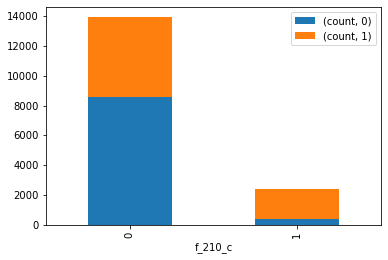

In [51]:
quick_data = (data.groupby ('f_210_c').default.value_counts ()
                      .rename ().reset_index ()
                      .rename (columns = {0 : 'count'}))
        
quick_data.pivot (index = 'f_210_c', columns='default').plot.bar (stacked=True)

plt.legend ()
plt.show ()

f_30_c


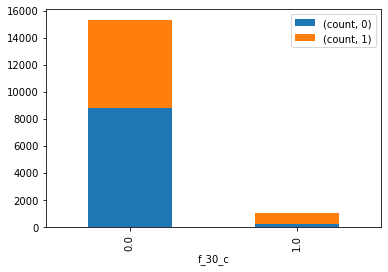

f_131_c


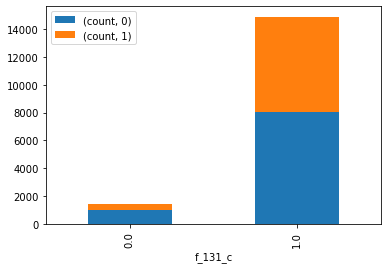

f_133_c


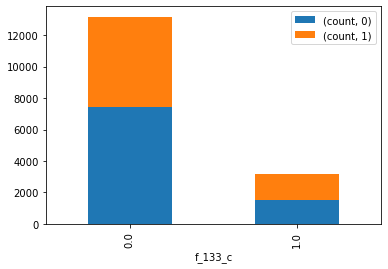

f_134_c


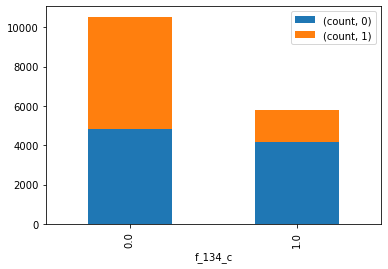

f_139_c


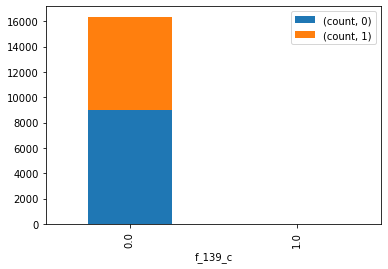

f_140_c


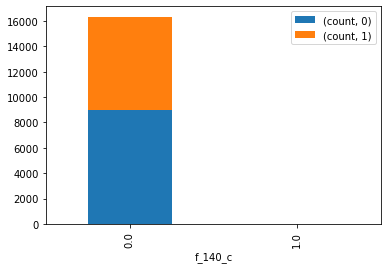

f_141_c


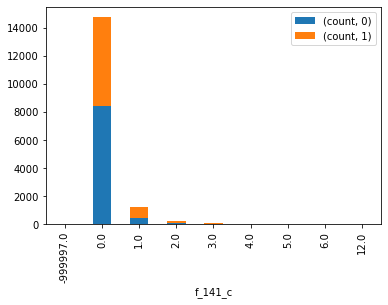

f_147_c


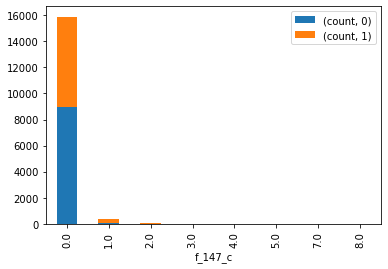

f_148_c


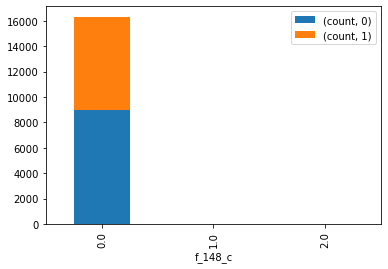

f_159_c


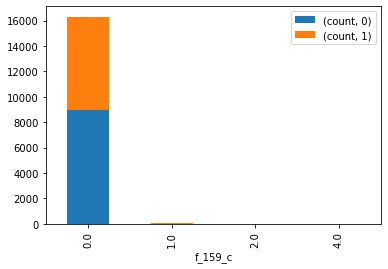

f_160_c


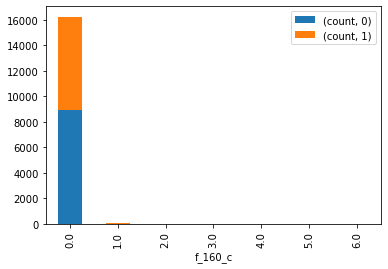

f_161_c


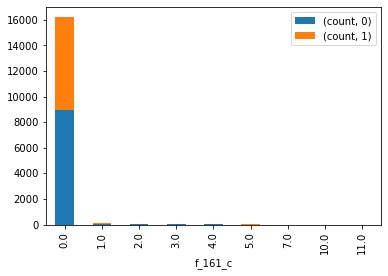

f_163_c


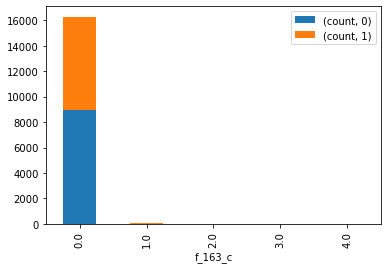

f_164_c


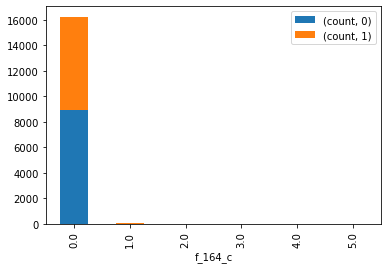

f_165_c


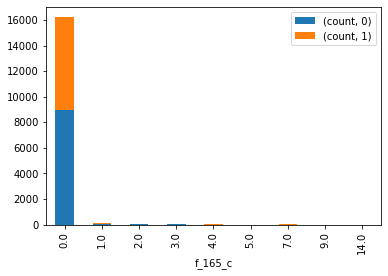

f_210_c


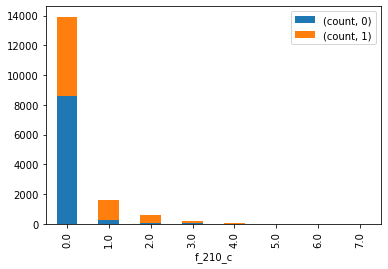

f_212_c


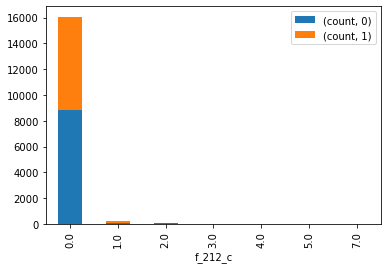

f_230_c


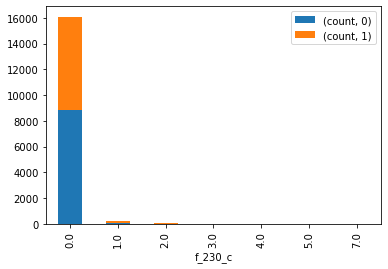

In [23]:
factors = []

for c in data.set_index ('uid').columns.values [:-5]:
    if (c [-1] != 'c'):
        continue
    else:
        print (c)
        factors.append (c)
        
        quick_data = (data.groupby (c).default.value_counts ()
                      .rename ().reset_index ()
                      .rename (columns = {0 : 'count'}))
        
        quick_data.pivot (index = c, columns='default').plot.bar (stacked=True)
        
        plt.legend ()
        plt.show ()

In [24]:
factors_to_drop = [
 'f_133_c',
 'f_139_c',
 'f_140_c',
 'f_148_c',
 'f_159_c',
 'f_160_c',
 'f_161_c',
 'f_163_c',
 'f_164_c',
 'f_165_c',
 'f_212_c',
 'f_230_c']

data.drop (factors_to_drop, axis = 1, inplace = True)

In [25]:
data.f_141_c = data.f_141_c.apply (lambda x : 0 if x == 0 else 1)
data.f_147_c = data.f_147_c.apply (lambda x : 0 if x == 0 else 1)
data.f_210_c = data.f_210_c.apply (lambda x : 0 if x == 0 else 1)

## Dealing with objects

These probably have something to do with the months. So...it will be super helpful to understand them, but probably best deal with them later. 

These will be useful for something like the random forest—just include the month of default in there too. 

## The final selection

This is the final selection of variables for something like a logistic regression, where selection is more important

In [26]:
data.columns.values

array(['uid', 'f_1', 'f_3', 'f_17', 'f_18', 'f_21', 'f_23_o', 'f_24_o',
       'f_25_o', 'f_26_o', 'f_27_o', 'f_28_o', 'f_29', 'f_30_c', 'f_31',
       'f_35', 'f_39', 'f_40', 'f_41', 'f_43_o', 'f_44_o', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_59', 'f_64', 'f_67',
       'f_68', 'f_70', 'f_72', 'f_73', 'f_74', 'f_76', 'f_79', 'f_80',
       'f_81', 'f_82', 'f_83', 'f_85', 'f_87', 'f_89', 'f_92', 'f_95',
       'f_99', 'f_100', 'f_101', 'f_102', 'f_103', 'f_104', 'f_108',
       'f_109', 'f_113', 'f_114_o', 'f_115_o', 'f_116_o', 'f_117_o',
       'f_118_o', 'f_119_o', 'f_120_o', 'f_121_o', 'f_122_o', 'f_125_o',
       'f_126_o', 'f_127_o', 'f_128_o', 'f_129_o', 'f_130_o', 'f_131_c',
       'f_134_c', 'f_135', 'f_136', 'f_137', 'f_141_c', 'f_143_o',
       'f_147_c', 'f_149_o', 'f_150_o', 'f_151_o', 'f_152_o', 'f_153_o',
       'f_154_o', 'f_155', 'f_167', 'f_169', 'f_173_o', 'f_174_o',
       'f_175_o', 'f_183_o', 'f_184_o', 'f_185_o', 'f_186_o', 'f_187_o',
   

In [28]:
imputed_data = []

for c in missing_names:
    imputed_data.append (c [:-2])
    data [c [:-2]] = data [c [:-2]].apply (lambda x : 0 if x < 0 else x)

In [29]:
factors_to_keep = [c for c in data.columns.values if c [-1] == 'c']

In [30]:
data [['uid', 'total_valid_loan_number', 'no_repay_loan_number'] + 
      not_missing + 
      factors_to_keep + 
      missing_names + 
      imputed_data].columns

Index(['uid', 'total_valid_loan_number', 'no_repay_loan_number', 'f_1', 'f_3',
       'f_40', 'f_59', 'f_64', 'f_68', 'f_70', 'f_82', 'f_113', 'f_137',
       'f_211', 'f_30_c', 'f_131_c', 'f_134_c', 'f_141_c', 'f_147_c',
       'f_210_c', 'f_29_m', 'f_41_m', 'f_45_m', 'f_73_m', 'f_76_m', 'f_99_m',
       'f_102_m', 'f_109_m', 'f_155_m', 'f_169_m', 'f_228_m', 'f_231_m',
       'f_232_m', 'f_29', 'f_41', 'f_45', 'f_73', 'f_76', 'f_99', 'f_102',
       'f_109', 'f_155', 'f_169', 'f_228', 'f_231', 'f_232'],
      dtype='object')

In [33]:
variables = ['uid', 'f_1', 'f_3',
       'f_40', 'f_59', 'f_64', 'f_68', 'f_70', 'f_82', 'f_113', 'f_137',
       'f_211', 'f_30_c', 'f_131_c', 'f_134_c', 'f_141_c', 'f_147_c',
       'f_210_c', 'f_29_m', 'f_41_m', 'f_45_m', 'f_73_m', 'f_76_m', 'f_99_m',
       'f_102_m', 'f_109_m', 'f_155_m', 'f_169_m', 'f_228_m', 'f_231_m',
       'f_232_m', 'f_29', 'f_41', 'f_45', 'f_73', 'f_76', 'f_99', 'f_102',
       'f_109', 'f_155', 'f_169', 'f_228', 'f_231', 'f_232']

In [34]:
with open('../data/chosen_variables.txt', 'w') as f:
    for variable in variables:
        # write each item on a new line
        f.write("%s\n" % variable)

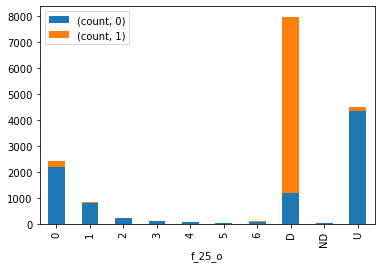

In [53]:
quick_data = (data.groupby ('f_25_o').default.value_counts ()
                      .rename ().reset_index ()
                      .rename (columns = {0 : 'count'}))
        
quick_data.pivot (index = 'f_25_o', columns='default').plot.bar (stacked=True)
        
plt.legend ()
plt.show ()